<div style="border:solid green 2px; padding: 20px"> 
Oi Gabriel, tudo bem? 
    
Me chamo Lourenço, vou ser o corretor em português do seu projeto! Prazer em conhecê-lo! 🙌 
 
Meus comentários irão seguir o seguinte padrão:

<div class="alert alert-success">
    <b>Correto:</b> Cumpriu corretamente tudo que foi pedido
</div>
<div class="alert alert-warning">
    <b>Recomendação:</b> Existe espaço para melhoramento do código
</div>
<div class="alert alert-danger">
    <b>Precisa ser corrigido:</b> Esse tipo de comentário ocorre quando o código precisa de alguma mudança drástica. O projeto não pode ser aceito com comentários vermelhos.
</div>
    
Por favor, não delete meus comentários :) Se tiver alguma pergunta, basta respondê-los a partir da célula:
    
<div class="alert alert-block alert-info">
    <b>Comentário do aluno:</b> Copie essa célula e mude o texto para responder aos meus comentários.
</div>  

<div class="alert alert-block alert-success">
<b>Comentário geral do corretor</b> <a class="tocSkip"></a>

Gabriel, primeiramente muito obrigado por enviar o seu projeto! Está claro para mim seu empenho em fazê-lo.
    
<br />
    
Seu projeto está **exemplar**!! Todas as questões foram magistralmente respondidas, seu código está claro e o seu raciocínio está bem embasado. Você fez uso correto de todas as principais técnicas envolvidas nesse projeto, parabéns! Por conta disso, seu projeto será **aprovado**!
    
<br />
    
Espero que você consiga manter esse ritmo nos próximos módulos e que o seu aprendizado continue sendo frutífero. Não hesite em contatar nossos **tutores** em caso de dúvidas. Um abraço!    
    
</div>

# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

Carregue bibliotecas que você acredita que são necessárias para o projeto. Você pode perceber depois que você precisa de bibliotecas adicionais conforme você avança, o que é totalmente normal - apenas certifique-se de atualizar essa seção quando perceber isso.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Sempre importante manter as bibliotecas organizadas!
</div>

### Carregue dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

Agora vamos explorar nossos dados e querer ver quantas colunas e linhas ele tem, veja algumas linhas para verificar possíveis problemas com os dados.

In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
# imprima uma amostragem dos dados
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Percebemos que não há valores duplicados e algumas colunas estão com dados faltantes, utilizaremos a melhor forma, mas para isso precisamos investigar mais, para que isso não atrapalhe em nossa pesquisa.

In [5]:
df.duplicated().sum()

0

Há valores inconsistentes na coluna 'Price'. por exemplo: valor de um carro ser avaliado em 1 dolar.

In [6]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Há valores faltantes nas seguintes colunas:'model_year' , 'cylinders' , 'odometer' ,'paint_color' ,'paint_color' ,'is_4wd'(sendo a maior em valores faltantes).

In [7]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
(df.isnull().sum() / df.shape[0]) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Boas observações!
</div>

### Conclusões e próximos passos

Na coluna 'is_4wd ' podemos notar 50% dos dados sobre o nosso dataFrame estão faltantes. Ela é uma coluna booleana, por essa razão, se um campo booleano contém apenas valores True ou False, é razoável presumir que valores ausentes são False.
Em 'model_year', os valores faltantes correspondem a 7%, podemos substituir os valores ausente com a mediana de seus dados, correlacionando com a coluna 'model', sendo assim, não impactando na filtragem de dados.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Bem explicado e observado!
</div>

In [9]:
df[df['is_4wd'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [10]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [11]:
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [12]:
df[df['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [13]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [14]:
df[df['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


## Cuide dos valores ausentes (se houver algum)

Primeiro iremos substituir Nan em 'is_4wd' por '0' , as colunas 'model_year' e'cylinders' com dados faltante substituimos pela medianas para não afetasse tanto na nossa filtragem de dados, já na coluna 'odometer' substituimos pela mediana também mas porém existem dados são unicos e não conseguimos preencher com a médiana, pois são carros muito antigos presumimos que foram reformados, sendo assim tem a idade avançada porém seu odômetro é de um carro 0 km. Na coluna 'paint_color' não podemos presumir a cor do carro com base nas outras colunas, então preencheremos como desconhecido.

In [15]:
df['is_4wd'].fillna(0, inplace = True)

In [16]:
df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'), inplace=True)

In [17]:
df["cylinders"].fillna(df.groupby(["model","fuel"])["cylinders"].transform('median'), inplace=True)

In [18]:
df["cylinders"].fillna(df.groupby("model")["cylinders"].transform('median'), inplace=True)

In [19]:
df["odometer"].fillna(df.groupby(["model_year","type"])["odometer"].transform('median'), inplace=True)

In [20]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
14583,750,1986.0,ford taurus,fair,6.0,gas,NaN,automatic,sedan,blue,0.0,2019-02-17,54
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,0.0,2018-12-15,18
25031,2300,1993.0,jeep wrangler,good,6.0,gas,NaN,manual,other,brown,1.0,2019-01-06,48
26850,10000,1976.0,chevrolet corvette,good,8.0,gas,NaN,automatic,coupe,white,0.0,2018-09-24,17
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,NaN,0.0,2018-11-03,41
35617,20500,1970.0,chevrolet malibu,excellent,8.0,gas,NaN,automatic,sedan,yellow,0.0,2018-10-02,52
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
45832,6000,1985.0,chevrolet suburban,good,8.0,gas,NaN,manual,SUV,blue,0.0,2018-05-30,123


In [21]:
 df['odometer'].fillna('0',inplace=True ) 

In [22]:
df['paint_color'].fillna('unknown',inplace=True )

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  object 
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

## Corrija os tipos de dados

Na coluna 'price' há carros custando menos de 200 dolares podemos pegar a mediana desses carros com dados semelhantes e substituir esses valores. Muito improvavel mesmo que seja sucata um carro que custe menos de 200 dolares. Conseguimos visualizar alguns valores em 'price' que estão muito elevados e fizemos uma analise nas demais colunas.Iremo mudar o tipo de dado da coluna 'date_posted' de object para datetime64[ns] e de 'odometer' de object para int.

In [24]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [25]:
df.query("price == 1 ")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,unknown,0.0,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,unknown,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,0.0,2019-03-18,63
3902,1,1996.0,ford f-150,fair,8.0,gas,163000.0,manual,truck,white,0.0,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,unknown,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,147500.0,automatic,SUV,black,1.0,2018-08-06,28
49709,1,2010.0,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,93000.0,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


In [26]:
df.query("price < 200 ").sort_values(by='price',ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33201,199,2015.0,nissan sentra,excellent,4.0,gas,120000.0,automatic,sedan,grey,0.0,2019-02-21,67
35142,199,2014.0,ford focus,excellent,4.0,gas,53000.0,automatic,sedan,white,0.0,2018-10-04,4
33818,199,2014.0,volkswagen passat,excellent,4.0,gas,61000.0,automatic,sedan,white,0.0,2018-05-21,75
15134,199,2018.0,toyota camry,excellent,4.0,gas,42114.0,automatic,SUV,unknown,0.0,2018-05-06,30
34762,199,2013.0,kia soul,excellent,4.0,gas,56924.0,automatic,hatchback,unknown,0.0,2018-06-06,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13445,1,2018.0,nissan rogue,excellent,4.0,gas,24000.0,automatic,SUV,black,1.0,2018-11-12,52
13446,1,2015.0,toyota sienna,excellent,6.0,gas,45208.0,automatic,van,black,1.0,2018-11-30,54
13447,1,2014.0,honda odyssey,excellent,10.0,gas,74946.0,automatic,van,unknown,1.0,2018-05-08,43
13449,1,2018.0,dodge charger,excellent,8.0,gas,14245.0,automatic,sedan,black,1.0,2018-05-02,28


In [27]:
df_median_price = df.groupby(['model','model_year','condition'])['price'].median()
df_median_price

model              model_year  condition
acura tl           1999.0      fair          1200.0
                               good          2947.5
                   2001.0      excellent     2300.0
                               fair          1099.0
                               good          3000.0
                                             ...   
volkswagen passat  2017.0      excellent    11500.0
                               good         13000.0
                               like new     16950.0
                               new          16950.0
                   2018.0      excellent    14500.0
Name: price, Length: 5967, dtype: float64

In [28]:
def fill_price(row):
    if row['price'] <  200 :
        return df_median_price[row['price']]
    return row['price']

In [29]:
df['price'] = df.apply(fill_price, axis=1)

In [30]:
df.query('price > 189000 ')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
11359,300000.0,2015.0,ram 2500,excellent,6.0,diesel,88500.0,automatic,truck,grey,1.0,2018-10-15,39
12504,375000.0,1999.0,nissan frontier,good,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21


In [31]:
df= df[df['price']> 200].reset_index()
df

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,0,9400.0,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,1,25500.0,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,2,5500.0,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,3,1500.0,2003.0,ford f-150,fair,8.0,gas,165025.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,4,14900.0,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51515,51520,9249.0,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51516,51521,2700.0,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51517,51522,3950.0,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51518,51523,7455.0,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [32]:
df.describe()

,index,price,model_year,cylinders,is_4wd,days_listed
count,51520.000000,51520.000000,51520.000000,51520.000000,51520.000000,51520.000000
mean,25761.874670,12207.761083,2009.793915,6.123224,0.496312,39.553804
std,14874.647847,9995.676399,6.099084,1.658521,0.499991,28.200162
min,0.000000,204.000000,1908.000000,3.000000,0.000000,0.000000
25%,12879.750000,5000.000000,2007.000000,4.000000,0.000000,19.000000
50%,25761.500000,9000.000000,2011.000000,6.000000,0.000000,33.000000
75%,38644.250000,16900.000000,2014.000000,8.000000,1.000000,53.000000
max,51524.000000,375000.000000,2019.000000,12.000000,1.000000,271.000000


In [33]:
df['model_year'].value_counts().sort_values(ascending=False)

2011.0    4017
2013.0    3994
2012.0    3982
2014.0    3540
2008.0    3462
          ... 
1955.0       1
1929.0       1
1948.0       1
1961.0       1
1936.0       1
Name: model_year, Length: 70, dtype: int64

In [34]:
df['model'].value_counts().sort_values(ascending=False)

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [35]:
df['condition'].value_counts().sort_values(ascending=False)

excellent    24771
good         20145
like new      4741
fair          1605
new            143
salvage        115
Name: condition, dtype: int64

In [36]:
df['cylinders'].value_counts().sort_values(ascending=False)

8.0     17764
6.0     17381
4.0     15494
10.0      549
5.0       295
3.0        34
12.0        2
3.5         1
Name: cylinders, dtype: int64

In [37]:
df['fuel'].value_counts().sort_values(ascending=False)

gas         47283
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [38]:
df['odometer'].describe()

count      51520.0
unique     17854.0
top       140000.0
freq         324.0
Name: odometer, dtype: float64

In [39]:
df['transmission'].value_counts().sort_values(ascending=False)

automatic    46897
manual        2829
other         1794
Name: transmission, dtype: int64

In [40]:
df['type'].value_counts().sort_values(ascending=False)

SUV            12403
truck          12353
sedan          12151
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [41]:
df['paint_color'].value_counts().sort_values(ascending=False)

white      10027
unknown     9267
black       7692
silver      6243
grey        5037
blue        4475
red         4419
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

In [42]:
df['is_4wd'].value_counts().sort_values(ascending=False)

0.0    25950
1.0    25570
Name: is_4wd, dtype: int64

In [43]:
df['date_posted'].value_counts().sort_values(ascending=False)

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2018-06-08    117
2019-01-11    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64

In [44]:
df['days_listed'].describe()

count    51520.000000
mean        39.553804
std         28.200162
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Dados corrigidos corretamente!
</div>

## Enriqueça os dados

Adicionamos a coluna 'age' que é a idade do veículo com base da diferença entre 'date_posted' data que a propaganda foi publicada,'days_listed' dias desde a publicação até a retirada, adicionamos a coluna 'age_km' que é a kilometragem anual desse veículo e substituimos o valores de 'condition' de string em valores de string por uma escala numérica: novo = 5 ,como novo = 4,excellente = 3, bom = 2, razoável = 1 e sucata = 0.

In [45]:
# Adicione valores data/hora para quando a propaganda estiver colocada
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [46]:
df['date_posted'].value_counts().sort_values(ascending=False)

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64

In [47]:
# Adicione a idade do veículo quando a propaganda for colocada
df['age'] = (df['date_posted'].dt.year) - (df['model_year'])


In [48]:
df['odometer'] = df['odometer'].astype('int')

In [49]:
df['age'] = df['age'].astype('int')

In [50]:
# Adicione a quilometragem média por ano
df['age_km'] = df['odometer'] / df['age'].where(df['age'] != 0, 1)

In [51]:
df['age_km'] = df['age_km'].astype('int')

In [52]:
df['age_km'].describe()

count     51520.000000
mean      17748.582046
std       12491.352203
min           0.000000
25%       10903.000000
50%       15174.500000
75%       21262.000000
max      373200.000000
Name: age_km, dtype: float64

In [53]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente

def fill_condition(row):
    if row['condition'] == 'new':
        return 5  # Veículo novo
    if row['condition'] == 'like new':
        return 4 # Veículo igual a novo
    if row['condition'] == 'excellent':
        return 3 # Veículo excelente
    if row['condition'] == 'good':
        return 2 # Veículo bom
    if row['condition'] == 'fair':
        return 1 # Veículo razoável
    if row['condition'] == 'salvage':
        return 0 # Sucata
   


In [ ]:
df['condition'] = df.apply(fill_condition, axis=1)

In [55]:
df['condition'].value_counts()

3    24771
2    20145
4     4741
1     1605
5      143
0      115
Name: condition, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

## Verifique os dados limpos

Pronto nosso DataFrame está pronto para fazer as nossas pesquisas.

In [56]:
# imprima as informações gerais/resumidas sobre o DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51520 entries, 0 to 51519
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         51520 non-null  int64         
 1   price         51520 non-null  float64       
 2   model_year    51520 non-null  float64       
 3   model         51520 non-null  object        
 4   condition     51520 non-null  int64         
 5   cylinders     51520 non-null  float64       
 6   fuel          51520 non-null  object        
 7   odometer      51520 non-null  int64         
 8   transmission  51520 non-null  object        
 9   type          51520 non-null  object        
 10  paint_color   51520 non-null  object        
 11  is_4wd        51520 non-null  float64       
 12  date_posted   51520 non-null  datetime64[ns]
 13  days_listed   51520 non-null  int64         
 14  age           51520 non-null  int64         
 15  age_km        51520 non-null  int64 

In [57]:
# imprima uma amostragem dos dados
df.head(5)

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,age_km
0,0,9400.0,2011.0,bmw x5,2,6.0,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,7,20714
1,1,25500.0,2011.0,ford f-150,2,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,7,12672
2,2,5500.0,2013.0,hyundai sonata,4,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,6,18333
3,3,1500.0,2003.0,ford f-150,1,8.0,gas,165025,automatic,pickup,unknown,0.0,2019-03-22,9,16,10314
4,4,14900.0,2017.0,chrysler 200,3,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2,40451


## Estude os parâmetros fundamentais

Iremos fazer um histogramas das colunas do nosso DataFrame e identificar se os valores atípicos afetam a forma e a legibilidade dos histogramas

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

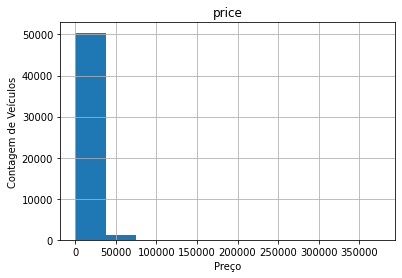

In [58]:
#Histograma 'price'
df.hist('price');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Preço');

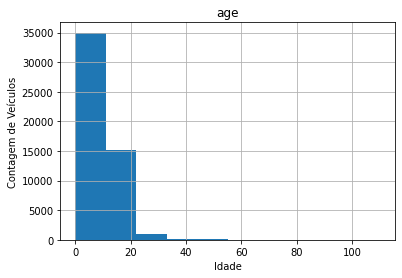

In [59]:
#Histograma 'age'
df.hist('age');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Idade');

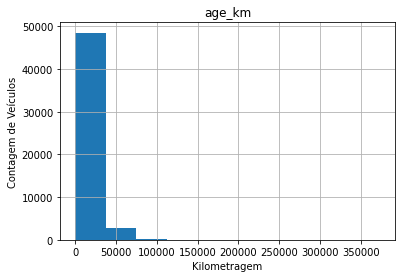

In [60]:
#Histograma 'age_km'
df.hist('age_km');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Kilometragem');

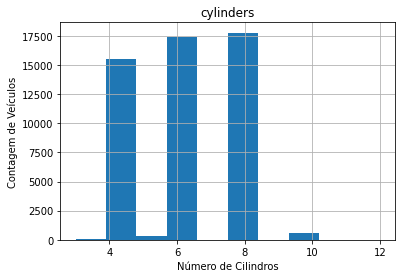

In [61]:
#Histograma 'cylinders'
df.hist('cylinders');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Número de Cilindros');

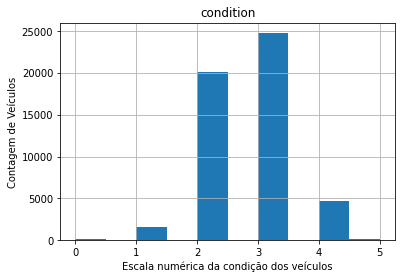

In [62]:
#Histograma 'condition'
df.hist('condition');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Escala numérica da condição dos veículos');

## Estude e cuide dos valores ausentes


Existem 3 colunas com valores atipicos 'price' , 'age' e 'age_km'. Vamos determinar o limite inferior e superior, e armazenar em novo DataFrame sem 'outliers'.

In [63]:
# Determine o limite inferior para valores atípicos
Q1_price = df['price'].quantile(0.25)
Q1_age = df['age'].quantile(0.25)
Q1_age_km = df['age_km'].quantile(0.25)

In [64]:
# Determine o limite superior para valores atípicos
Q3_price = df['price'].quantile(0.75)
Q3_age = df['age'].quantile(0.75)
Q3_age_km = df['age_km'].quantile(0.75)

In [65]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
IQR_price = Q3_price - Q1_price
IQR_age = Q3_age - Q1_age
IQR_age_km = Q3_age_km - Q1_age_km


limite_superior_price = Q3_price+(1.5*IQR_price)
limite_superior_age = Q3_age+(1.5*IQR_age)
limite_superior_age_km = Q3_age_km+(1.5*IQR_age_km)

limite_inferior_price = Q1_price - (1.5 * IQR_price)
limite_inferior_age = Q1_age - (1.5 * IQR_age)
limite_inferior_age_km = Q1_age_km - (1.5 * IQR_age_km)


In [66]:
df_limp = df[df['price'] > limite_inferior_price] 
df_limp = df_limp[df_limp['price'] < limite_superior_price]
df_limp = df_limp[df_limp['age'] > limite_inferior_age] 
df_limp = df_limp[df_limp['age'] < limite_superior_age]
df_limp = df_limp[df_limp['age_km'] > limite_inferior_age_km] 
df_limp = df_limp[df_limp['age_km'] < limite_superior_age_km]

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

## Estude os parâmetros fundamentais sem valores atípicos

Em comparação com os histogramas anteriores, todas as colunas ficaram com os sem dados mais visiveis, sendo assim podemos dizer que mais de 12000 veículos valem 5000 dolares, mais de 10000 tem a idade de 9 anos , mais de 11000 tem ao menos 14000 km rodados, 16000 veículos tem 6 cilindros e 25000 veículos, metade do nosso DataFrame, estão em excelentes condições. 

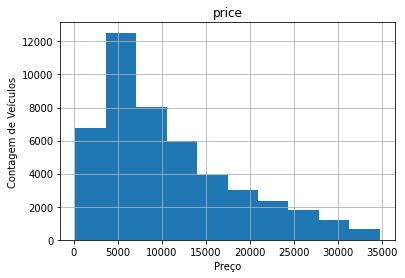

In [67]:
df_limp.hist('price');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Preço');

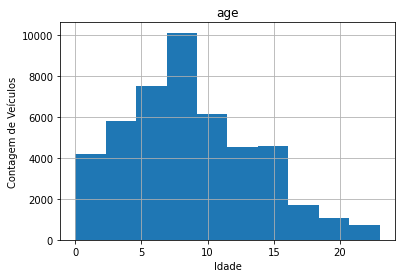

In [68]:
df_limp.hist('age');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Idade');

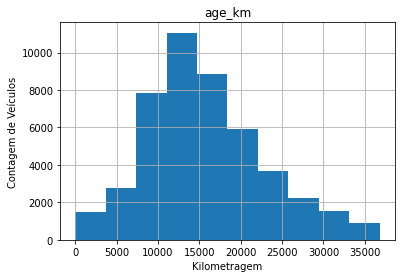

In [69]:
df_limp.hist('age_km');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Kilometragem');

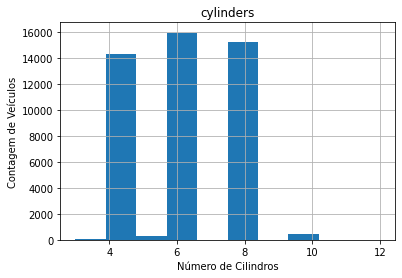

In [70]:
df_limp.hist('cylinders');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Número de Cilindros');

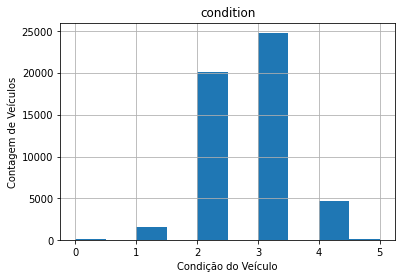

In [71]:
df.hist('condition');
plt.ylabel('Contagem de Veículos');
plt.xlabel('Condição do Veículo');

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ótimo!
</div>

## Tempo de vida das propagandas

Analisando os histogramas a seguir, percebemos que a vida média das propagandas, tem sua máxima de 39 dias e depois vem em queda livre, sobrando algumas em 46 dias.

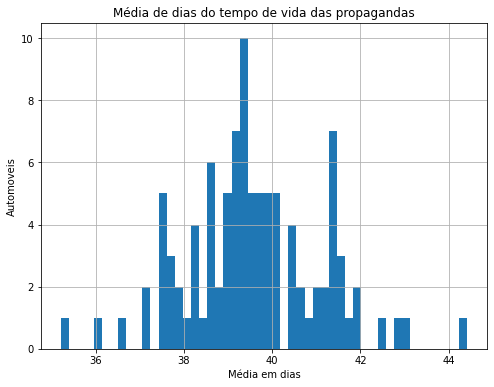

In [72]:
avg_days_listed = df_limp.pivot_table(index='model',values='days_listed', aggfunc='mean')
avg_days_listed.hist(bins=50, figsize=(8,6));
plt.title('Média de dias do tempo de vida das propagandas')
plt.xlabel('Média em dias');
plt.ylabel('Automoveis');

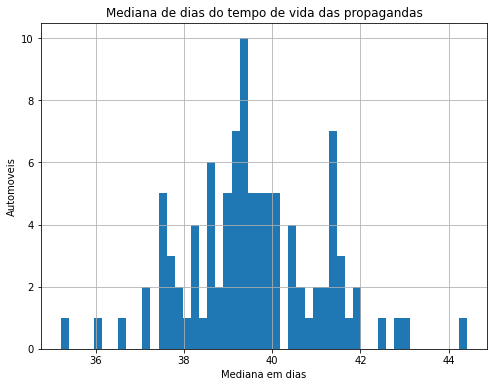

In [73]:
median_days_listed = df_limp.pivot_table(index='model',values='days_listed',aggfunc='median')
avg_days_listed.hist(bins=50, figsize=(8,6));
plt.title('Mediana de dias do tempo de vida das propagandas')
plt.xlabel('Mediana em dias');
plt.ylabel('Automoveis');

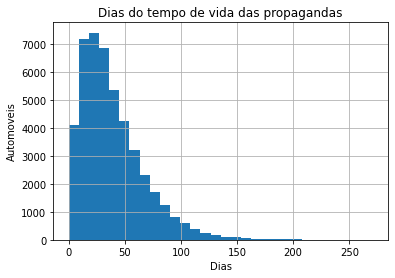

In [74]:
df_limp.hist('days_listed', bins=30);
plt.title('Dias do tempo de vida das propagandas')
plt.xlabel('Dias');
plt.ylabel('Automoveis');

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

## Média de preços por cada tipo de veículo

Podemos ver a dependência do número de propagandas em relação ao tipo de veículo e média de preço sobre o tipo de veículo. 'bus' e 'truck' estão entre os veículos mais caros e 'sedan' e 'hatchback' os mais baratos. 'sedan' e 'SUV' são os tipos de veículos com os maiores números de propapgadas.

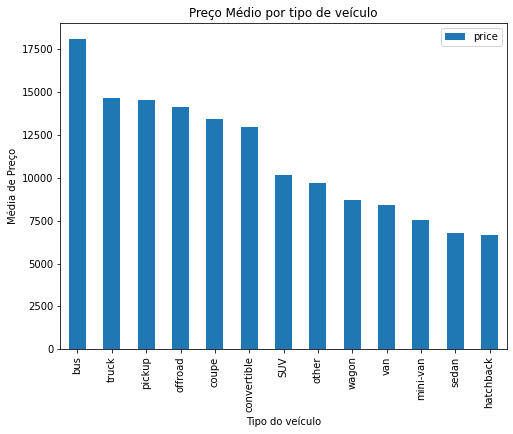

In [103]:
avg_price_type = df_limp.pivot_table(index='type', values='price',aggfunc='mean').sort_values(by='price',ascending=False)
avg_price_type.plot(kind='bar',figsize=(8,6));
plt.xlabel('Tipo do veículo');
plt.ylabel('Média de Preço');
plt.title('Preço Médio por tipo de veículo');

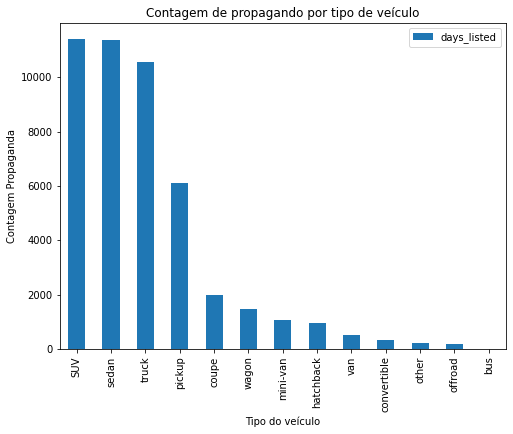

In [104]:
avg_price_days_listed = df_limp.pivot_table(index='type', values='days_listed',aggfunc='count').sort_values(by='days_listed',ascending=False)
avg_price_days_listed.plot(kind='bar',figsize=(8,6));
plt.xlabel('Tipo do veículo');
plt.ylabel('Contagem Propaganda');
plt.title('Contagem de propagando por tipo de veículo');

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

## Fatores de preço

Podemos analisar que idade, quilometragem, condição, tipo de transmissão influenciam diretamente no preço do veículo, porém a cor é apenas uma questão de gosto, pois não varia muito a questão do preço.

In [95]:
df_limp_suv = df_limp.query("type == 'SUV'")
df_limp_sedan = df_limp.query("type == 'sedan'")

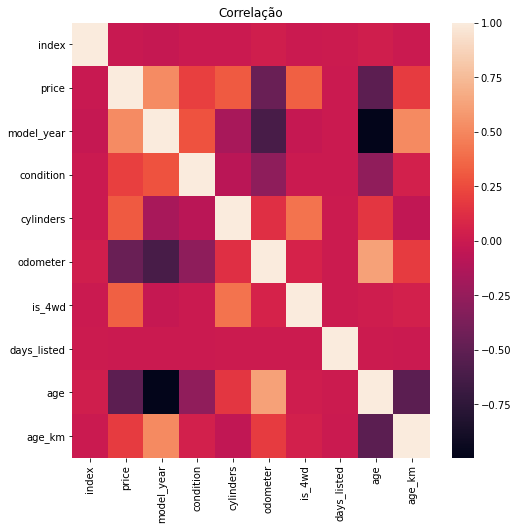

In [105]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(df_limp.corr());
plt.title('Correlação');

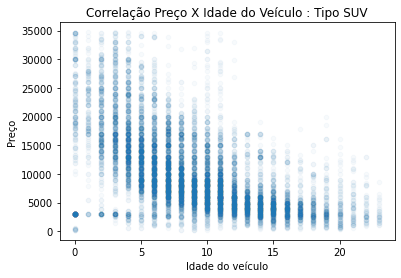

In [78]:
df_limp_suv.plot(x='age', y='price', kind='scatter', alpha=0.03);
plt.title('Correlação Preço X Idade do Veículo : Tipo SUV');
plt.xlabel('Idade do veículo');
plt.ylabel('Preço');

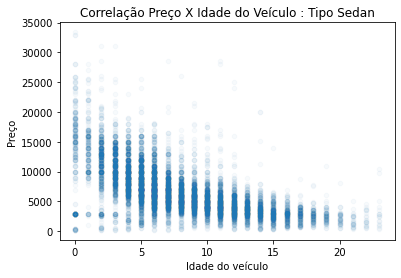

In [79]:
df_limp_sedan.plot(x='age', y='price', kind='scatter', alpha=0.03);
plt.title('Correlação Preço X Idade do Veículo : Tipo Sedan');
plt.xlabel('Idade do veículo');
plt.ylabel('Preço');

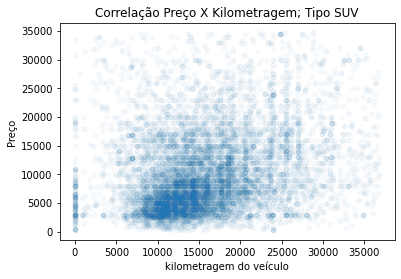

In [80]:
df_limp_suv.plot(x='age_km', y='price', kind='scatter', alpha=0.03);
plt.title('Correlação Preço X Kilometragem; Tipo SUV');
plt.xlabel('kilometragem do veículo');
plt.ylabel('Preço');

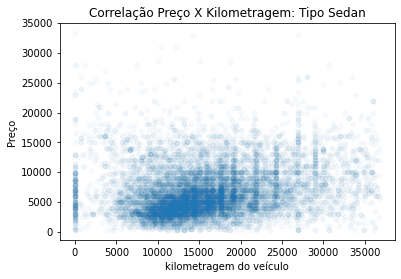

In [81]:
df_limp_sedan.plot(x='age_km', y='price', kind='scatter', alpha=0.03);
plt.title('Correlação Preço X Kilometragem: Tipo Sedan');
plt.xlabel('kilometragem do veículo');
plt.ylabel('Preço');

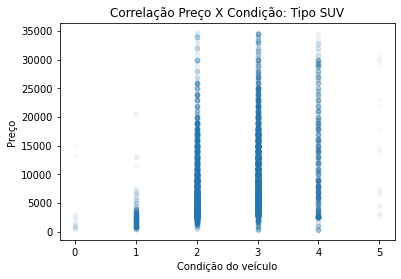

In [82]:
df_limp_suv.plot(x='condition', y='price', kind='scatter', alpha=0.03)
plt.title('Correlação Preço X Condição: Tipo SUV');
plt.xlabel('Condição do veículo');
plt.ylabel('Preço');

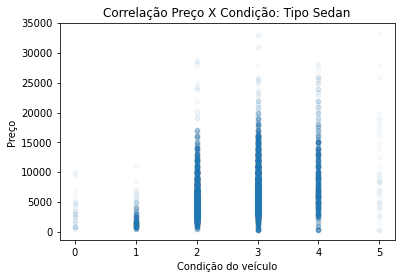

In [83]:
df_limp_sedan.plot(x='condition', y='price', kind='scatter', alpha=0.03)
plt.title('Correlação Preço X Condição: Tipo Sedan');
plt.xlabel('Condição do veículo');
plt.ylabel('Preço');

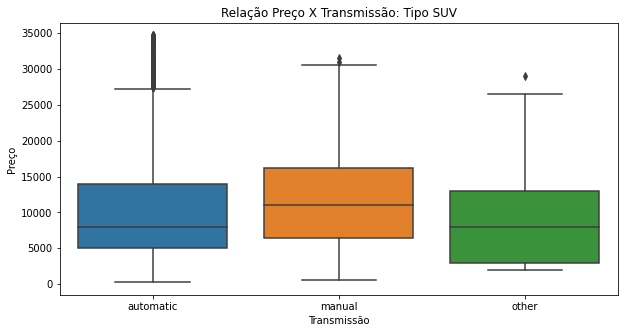

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='transmission', y='price', data=df_limp_suv)
plt.title('Relação Preço X Transmissão: Tipo SUV');
plt.xlabel('Transmissão');
plt.ylabel('Preço');

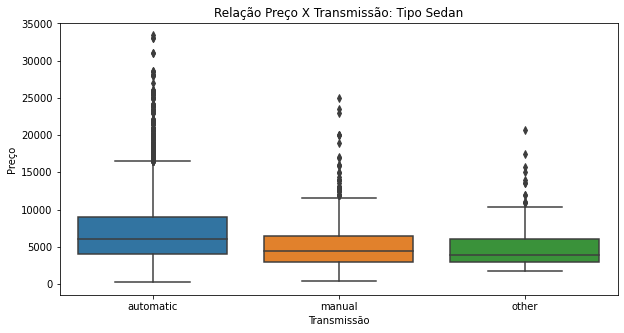

In [98]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='transmission', y='price', data=df_limp_sedan)
plt.title('Relação Preço X Transmissão: Tipo Sedan');
plt.xlabel('Transmissão');
plt.ylabel('Preço');

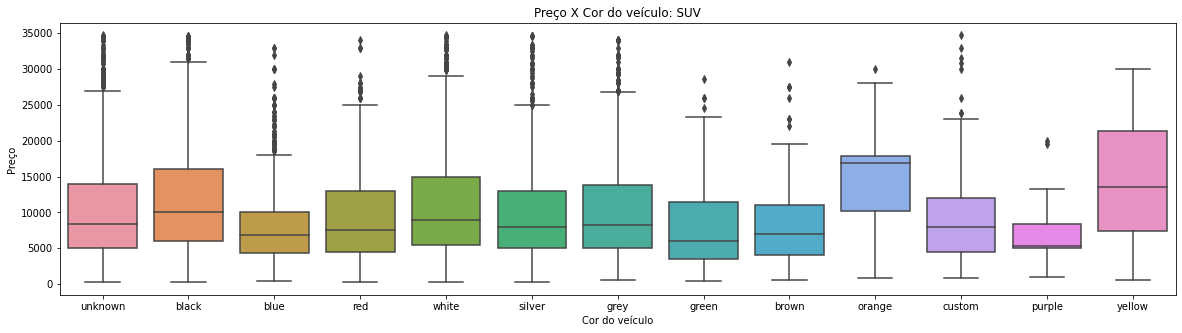

In [86]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x='paint_color', y='price', data=df_limp_suv)
plt.title('Preço X Cor do veículo: SUV');
plt.xlabel('Cor do veículo');
plt.ylabel('Preço');

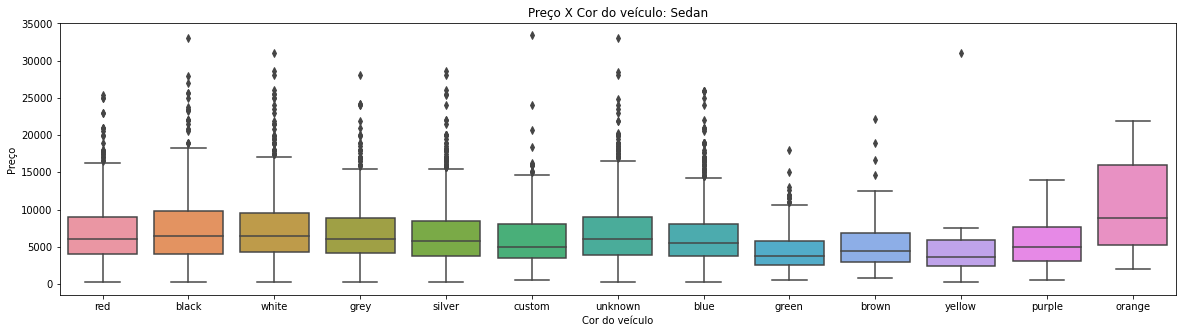

In [87]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x='paint_color', y='price', data=df_limp_sedan)
plt.title('Preço X Cor do veículo: Sedan');
plt.xlabel('Cor do veículo');
plt.ylabel('Preço');

## Conclusão geral

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos, e "matplotlib" e "seaborn" para a construção de graficos para melhor visualização e entendimento do problema.

Com base nos estudos realizamos o pré-processamento de dados,em cada coluna realizamos a padronização de estilos, modificamos valores incongruentes, substituimos valores ausentes com base em estudos sobre outras colunas com valores devidamente preenchidos, removemos as duplicatas de valores existente na base de dados,e realizamos o estudo os dados coletados nos últimos anos para determinar quais fatores influenciaram o preço de um veículo.

Com base na Análise exploratória de dados,concluimos que diversos fatores influênciam no preço, como: o ano, já que carros mais novos custam mais. A condição do veículo indicam que quanto mais conservado ou novo, o preço tende a ser maior. A kilometragem, carros que tem menos kilometragem tendem a ser mais caros. Os tipos mais comum que são sedan e SUV. Em média Carros SUV sua transmissão manueal normalmente é mais cara, porem o sedan, a transmissão automatica é mais cara, já a cor depende uma questão de gosto, pois tem suas médias de preço bem parecidas.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Muito bom Gabriel!
</div>